In [57]:
import pickle
import pandas as pd
import numpy as np
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn
import gensim
from sklearn.manifold import TSNE
import multiprocessing
%matplotlib inline
pd.options.display.max_colwidth = 2000

In [71]:
with open('comments_list.pkl', 'rb') as picklefile:
    comments_list = pickle.load(picklefile)

In [72]:
comments_list[:2]

[('2013-01-30 21:23:28',
  u'how many sneakers do you have @yagobi ??',
  '380633075979217445',
  'lebronxcanary'),
 ('2013-01-30 21:26:00',
  u'@steveekimm not enough... Hahah',
  '380633075979217445',
  'lebronxcanary')]

In [73]:
comments_df = pd.DataFrame(comments_list)
comments_df.columns = ['date_time', 'comment_text', 'media_id','shoe_name']
comments_df['date_time'] = pd.to_datetime(comments_df['date_time'],infer_datetime_format=True)

In [74]:
len(list(comments_df['shoe_name'].unique()))

202

In [75]:
comments_df.dtypes

date_time       datetime64[ns]
comment_text            object
media_id                object
shoe_name               object
dtype: object

In [77]:
comments_df['comment_text'] = comments_df['comment_text'].str.lower()
comments_df.tail(20)

,date_time,comment_text,media_id,shoe_name
15722,2017-01-23 21:51:51,heck yeah! dope 👊,1434491198986429148,adidasultraboostchinesenewyear
15723,2017-01-24 07:31:48,sick 👌🏻,1434491198986429148,adidasultraboostchinesenewyear
15724,2017-01-24 08:36:38,look at the flick of the wrist,1434491198986429148,adidasultraboostchinesenewyear
15725,2017-01-24 19:01:24,i like the ones on the right the most 😏,1434491198986429148,adidasultraboostchinesenewyear
15726,2017-01-26 21:11:17,hat for bat.,1434491198986429148,adidasultraboostchinesenewyear
15727,2017-02-22 17:51:06,@bstreetshoes the ones on the left,1434491198986429148,adidasultraboostchinesenewyear
15728,2017-01-24 10:36:16,"(sollldd) adidas ultraboost chinese new year size 6,5us , thx to mr. h (jakarta)...😊",1434888704467819623,adidasultraboostchinesenewyear
15729,2017-01-28 17:57:46,😄😄😄,1437991955761826822,adidasultraboostchinesenewyear
15730,2017-01-28 18:38:58,so fresh! 👌,1437991955761826822,adidasultraboostchinesenewyear
15731,2017-01-28 18:39:46,wow need a pair,1437991955761826822,adidasultraboostchinesenewyear


## Word2Vec

In [78]:
comments_df['comment_list'] = comments_df.comment_text.str.encode('ascii', 'ignore').str.lower()
comments_df['comment_list'] = comments_df.comment_text.str.split(" ")

In [65]:
data = []

In [66]:
for comment in comments_df['comment_list']:
    data.append(comment)

In [67]:
# split so each word is an item in a list
num_features = 80 # how many dimension ( 100 is standard )
context_size = 7 # window to look in
min_word_count = 1
num_workers = multiprocessing.cpu_count()

comment2vec = gensim.models.Word2Vec(
    data,
    size = num_features,
    window = context_size,
    min_count = min_word_count,
    workers = num_workers,
    sg=1,
    seed = 1)

# .most_similar = similar words
# PCA and TSNE to plot

In [68]:
comment2vec.most_similar('dope')

[(u'nice', 0.9983183145523071),
 (u'nice!', 0.9981657266616821),
 (u'awesome', 0.997053325176239),
 (u'dope!', 0.9967309236526489),
 (u'pic!', 0.9964722394943237),
 (u'sweet', 0.9963995814323425),
 (u'my', 0.9960874915122986),
 (u'follow', 0.9958930015563965),
 (u'please', 0.9958922863006592),
 (u'page', 0.9958818554878235)]

In [79]:
# Try your best to get a list of emojis... still some not being picked up like fist bump and peace sign
emoji_list = []
for i in comments_df.comment_list:
    for j in i:
        k = j.encode('unicode_escape')
        if (b'\\U000' in k[0:5]):
            if j[0:2] not in emoji_list:
                emoji_list.append(j[0:2])

In [80]:
# Replace emojis and words like "dope" with new words based on comment2vec
wlist = ['dope'] + emoji_list
for w in wlist:
    try:
        new_word = str(comment2vec.most_similar(w)[0][0])
        print(w, new_word)
        ## Replace words with comment2vec
        comments_df['comment_text'] = comments_df['comment_text'].str.replace(w, new_word)
    except:
        continue

('dope', 'nice')
(u'\U0001f612', 'son')
(u'\U0001f44c', 'sweet')
(u'\U0001f64f', 'po')
(u'\U0001f4af', 'v2s')
(u'\U0001f60d', 'shot')
(u'\U0001f602', '2')
(u'\U0001f4f7', 'amazing!')
(u'\U0001f446', 'olha')
(u'\U0001f440', 'blast')
(u'\U0001f606', 'e')
(u'\U0001f44d', '!')
(u'\U0001f60a', 'ok')
(u'\U0001f63b', 'bukan')
(u'\U0001f64c', 'shot')
(u'\U0001f3c0', 'een')
(u'\U0001f604', 'instagram')
(u'\U0001f4aa', 'shop')
(u'\U0001f631', 'mi')
(u'\U0001f60e', 'direct')
(u'\U0001f4a3', 've')
(u'\U0001f614', 'men')
(u'\U0001f601', 'hahaha')
(u'\U0001f61c', 'later')
(u'\U0001f4a5', 'wow!')
(u'\U0001f44f', 'trade')
(u'\U0001f618', ':d')
(u'\U0001f62e', '#aj')
(u'\U0001f603', 'profile')
(u'\U0001f51d', 'hat')
(u'\U0001f644', 'las')
(u'\U0001f42c', 'apple')
(u'\U0001f45f', 'boss')
(u'\U0001f449', 'sampe')
(u'\U0001f448', 'treating')
(u'\U0001f62d', '...')
(u'\U0001f607', ':d')
(u'\U0001f198', '#jordanharecdp')
(u'\U0001f4b8', 'buying')
(u'\U0001f917', 'dit')
(u'\U0001f44b', '@djdrimatik')
(u'\U00

In [81]:
comments_df.tail(20)

,date_time,comment_text,media_id,shoe_name,comment_list
15722,2017-01-23 21:51:51,heck yeah! nice 👊,1434491198986429148,adidasultraboostchinesenewyear,"[heck, yeah!, dope, 👊]"
15723,2017-01-24 07:31:48,sick sweet🏻,1434491198986429148,adidasultraboostchinesenewyear,"[sick, 👌🏻]"
15724,2017-01-24 08:36:38,look at the flick of the wrist,1434491198986429148,adidasultraboostchinesenewyear,"[look, at, the, flick, of, the, wrist]"
15725,2017-01-24 19:01:24,i like the ones on the right the most pack,1434491198986429148,adidasultraboostchinesenewyear,"[i, like, the, ones, on, the, right, the, most, 😏]"
15726,2017-01-26 21:11:17,hat for bat.,1434491198986429148,adidasultraboostchinesenewyear,"[hat, for, bat.]"
15727,2017-02-22 17:51:06,@bstreetshoes the ones on the left,1434491198986429148,adidasultraboostchinesenewyear,"[@bstreetshoes, the, ones, on, the, left]"
15728,2017-01-24 10:36:16,"(sollldd) adidas ultraboost chinese new year size 6,5us , thx to mr. h (jakarta)...ok",1434888704467819623,adidasultraboostchinesenewyear,"[(sollldd), adidas, ultraboost, chinese, new, year, size, 6,5us, ,, thx, to, mr., h, (jakarta)...😊]"
15729,2017-01-28 17:57:46,instagraminstagraminstagram,1437991955761826822,adidasultraboostchinesenewyear,[😄😄😄]
15730,2017-01-28 18:38:58,so fresh! sweet,1437991955761826822,adidasultraboostchinesenewyear,"[so, fresh!, 👌]"
15731,2017-01-28 18:39:46,wow need a pair,1437991955761826822,adidasultraboostchinesenewyear,"[wow, need, a, pair]"


# Sentiment Analysis

In [82]:
## Try out the different sentiment analyses
analyzer = SentimentIntensityAnalyzer()
afinn = Afinn(emoticons=True)
# Textblob
comments_df['sentiment_textblob'] = comments_df['comment_text'].apply(lambda x: TextBlob(x.strip()).sentiment.polarity)

# Vader
comments_df['sentiment_vader'] = comments_df['comment_text'].apply(lambda x: analyzer.polarity_scores(x.strip())['compound'])

# Afinn
comments_df['sentiment_afinn'] = comments_df['comment_text'].apply(lambda x: afinn.score(x.strip()))

## Output table for web

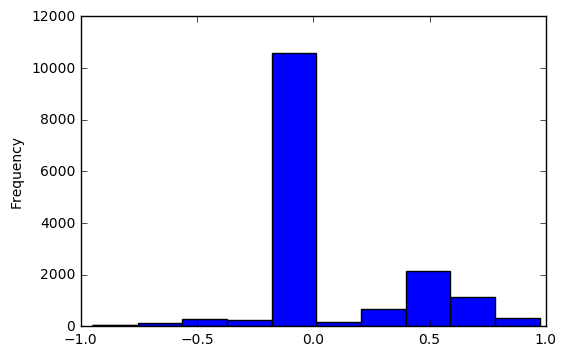

In [84]:
comments_df.sentiment_vader.plot(kind = 'hist')

In [85]:
def count_zeroes(colname):
    return len(comments_df.loc[comments_df[colname] == 0, colname])
print(count_zeroes('sentiment_textblob'))
print(count_zeroes('sentiment_vader'))
print(count_zeroes('sentiment_afinn'))

10874
10438
10374


In [86]:
# overall comment count and mean sentiment 
sentsum = comments_df.groupby('shoe_name')['sentiment_vader'].aggregate(['count', 'mean']).reset_index()
# number of comments in last month
recent = comments_df[comments_df.date_time > '2017-02-25']
recent = recent.groupby('shoe_name')['shoe_name'].size().reset_index()
sentsum = sentsum.merge(recent, how = 'left', on = 'shoe_name')
sentsum.columns = ['name', 'comments_total', 'mean_sentiment', 'comments_last_month']
sentsum.loc[sentsum.comments_last_month.isnull(), 'comments_last_month'] = 0
sentsum.loc[sentsum.comments_total < 5, 'mean_sentiment'] = np.nan
sentiment_not_null = len(sentsum[sentsum.mean_sentiment.notnull()])

In [87]:
sentsum['sentiment_rank'] = (sentsum['mean_sentiment'].rank() / sentiment_not_null).apply(lambda x: round(x, 3)) * 100
sentsum['comments_last_month_rank'] = (sentsum['comments_last_month'].rank() / len(sentsum)).apply(lambda x: round(x, 3)) * 100
sentsum['mean_sentiment'] = sentsum['mean_sentiment'].apply(lambda x: round(x, 2))
sentsum['comments_last_month'] = sentsum['comments_last_month'].apply(lambda x: round(x))

In [95]:
sentsum.sort_values(['comments_last_month'], ascending = False).head(40)

,name,comments_total,mean_sentiment,comments_last_month,sentiment_rank,comments_last_month_rank
55,airmaxmaster,3032,0.12,2905.0,51.5,100.0
51,airmaxcork,1899,0.13,141.0,54.0,99.5
26,adidasultraboosttripleblack,573,0.15,131.0,68.1,99.0
49,airmaxatmoselephant,133,0.17,98.0,80.4,98.5
59,airmaxsilverbullet,153,0.14,96.0,63.8,98.0
105,jordanretro,86,0.11,84.0,44.8,97.5
174,kyrieduke,132,0.10,81.0,43.6,97.0
163,kobeadoregon,77,0.16,74.0,72.4,96.5
5,adidasnmdolive,285,0.14,72.0,63.2,96.0
99,jordanchicago,100,0.07,58.0,29.4,95.5


In [89]:
sentsum = sentsum.sort_values('mean_sentiment', ascending = False)
print(sentsum.head())

                         name  comments_total  mean_sentiment  \
80   foampositeonephoenixsuns              14            0.45   
109         jordanretrobanned               5            0.40   
130         jordanretrolakers              13            0.39   
111       jordanretroblackcat              12            0.38   
127         jordanretrogymred               9            0.35   

     comments_last_month  sentiment_rank  comments_last_month_rank  
80                   0.0           100.0                      31.2  
109                  0.0            99.4                      31.2  
130                  0.0            98.8                      31.2  
111                  0.0            98.2                      31.2  
127                  0.0            97.5                      31.2  


In [90]:
sentsum.to_csv('sentsum.csv', index = False)

In [150]:
# sentsum.to_csv('from_ec2/sentsum.csv', index = False)